# Background of Problem Statement :

NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service. Each day, NYC311 receives thousands of requests related to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars. These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. The agency responds to the request, addresses it, and then closes it.

# Problem Objective :


Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.
Domain: Customer Service

In [1]:
# Import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Import a 311 NYC service request.


In [2]:
# Import the dataset
df_311NYC = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv", low_memory=False)

In [3]:
# Let's look at the first 5 observations
df_311NYC.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
# Let's look at the columns
df_311NYC.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [5]:
# Look at the types of each attribute
df_311NYC.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [6]:
# Look at the infomation of the dataset
df_311NYC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [7]:
# Let's check the shape of the dataset
df_311NYC.shape

(300698, 53)

# Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype

In [8]:
# Convert to datetime object
df_311NYC['Created Date'] = pd.to_datetime(df_311NYC['Created Date'])

In [9]:
# Convert to datetime object
df_311NYC['Closed Date'] = pd.to_datetime(df_311NYC['Closed Date'])

In [10]:
# One more time look at the data type of columns
df_311NYC.dtypes

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Intersection Street 1                     object
Intersection Street 2                     object
Address Type                              object
City                                      object
Landmark                                  object
Facility Type                             object
Status                                    object
Due Date            

In [11]:
df_311NYC.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


# Create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing.

In [12]:
# Create a new column 'Request_Closing_Time' to get the time difference between Request created and closed 
df_311NYC['Request_Closing_Time'] = df_311NYC['Closed Date'] - df_311NYC['Created Date']

In [13]:
df_311NYC['Request_Closing_Time'].head()

0   00:55:15
1   01:26:16
2   04:51:31
3   07:45:14
4   03:27:02
Name: Request_Closing_Time, dtype: timedelta64[ns]

In [14]:
# Let's look at the columns one more time
df_311NYC.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [15]:
# As it seen there are many unused columns.
# Let's do some cleanup
df_311NYC.drop(['Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
                'Intersection Street 1', 'Intersection Street 2','Resolution Description', 
                'Resolution Action Updated Date','Community Board','X Coordinate (State Plane)','School or Citywide Complaint',
                'Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Garage Lot Name','School Name', 'School Number', 
                'School Region', 'School Code','School Phone Number', 'School Address', 'School City', 'School State',
                'School Zip', 'School Not Found','Ferry Direction', 'Ferry Terminal Name','Unique Key','Bridge Highway Name',
                'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Latitude', 'Longitude','Location','Y Coordinate (State Plane)','Landmark'], axis=1, inplace=True)

In [16]:
# Look at the clean data
df_311NYC.head(10)

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,City,Facility Type,Status,Due Date,Borough,Park Facility Name,Park Borough,Request_Closing_Time
0,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,ADDRESS,NEW YORK,Precinct,Closed,01-01-16 7:59,MANHATTAN,Unspecified,MANHATTAN,00:55:15
1,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ADDRESS,ASTORIA,Precinct,Closed,01-01-16 7:59,QUEENS,Unspecified,QUEENS,01:26:16
2,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,ADDRESS,BRONX,Precinct,Closed,01-01-16 7:59,BRONX,Unspecified,BRONX,04:51:31
3,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,ADDRESS,BRONX,Precinct,Closed,01-01-16 7:57,BRONX,Unspecified,BRONX,07:45:14
4,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ADDRESS,ELMHURST,Precinct,Closed,01-01-16 7:56,QUEENS,Unspecified,QUEENS,03:27:02
5,2015-12-31 23:56:30,2016-01-01 01:50:00,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,ADDRESS,BROOKLYN,Precinct,Closed,01-01-16 7:56,BROOKLYN,Unspecified,BROOKLYN,01:53:30
6,2015-12-31 23:55:32,2016-01-01 01:53:00,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10032.0,ADDRESS,NEW YORK,Precinct,Closed,01-01-16 7:55,MANHATTAN,Unspecified,MANHATTAN,01:57:28
7,2015-12-31 23:54:05,2016-01-01 01:42:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10457.0,ADDRESS,BRONX,Precinct,Closed,01-01-16 7:54,BRONX,Unspecified,BRONX,01:47:55
8,2015-12-31 23:53:58,2016-01-01 08:27:00,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11415.0,ADDRESS,KEW GARDENS,Precinct,Closed,01-01-16 7:53,QUEENS,Unspecified,QUEENS,08:33:02
9,2015-12-31 23:53:58,2016-01-01 01:17:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,ADDRESS,BROOKLYN,Precinct,Closed,01-01-16 7:53,BROOKLYN,Unspecified,BROOKLYN,01:23:02


In [17]:
df_311NYC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   Created Date          300698 non-null  datetime64[ns] 
 1   Closed Date           298534 non-null  datetime64[ns] 
 2   Agency                300698 non-null  object         
 3   Agency Name           300698 non-null  object         
 4   Complaint Type        300698 non-null  object         
 5   Descriptor            294784 non-null  object         
 6   Location Type         300567 non-null  object         
 7   Incident Zip          298083 non-null  float64        
 8   Address Type          297883 non-null  object         
 9   City                  298084 non-null  object         
 10  Facility Type         298527 non-null  object         
 11  Status                300698 non-null  object         
 12  Due Date              300695 non-null  objec

In [18]:
df_311NYC.isna().sum()

Created Date               0
Closed Date             2164
Agency                     0
Agency Name                0
Complaint Type             0
Descriptor              5914
Location Type            131
Incident Zip            2615
Address Type            2815
City                    2614
Facility Type           2171
Status                     0
Due Date                   3
Borough                    0
Park Facility Name         0
Park Borough               0
Request_Closing_Time    2164
dtype: int64

# Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.


In [19]:
# Import seaborn library
import seaborn as sns

In [20]:
df_311NYC['Agency'].value_counts()

NYPD    300698
Name: Agency, dtype: int64

In [21]:
df_311NYC['Agency Name'].value_counts()

New York City Police Department    300690
Internal Affairs Bureau                 6
NYPD                                    2
Name: Agency Name, dtype: int64

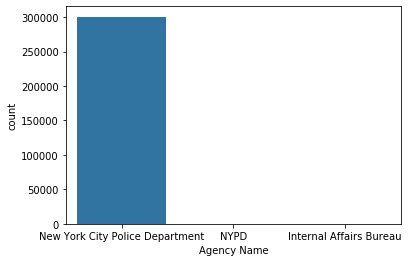

In [22]:
# Using Seaborn
sns.countplot(df_311NYC['Agency Name'])

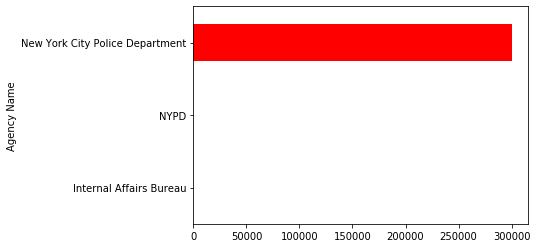

In [23]:
# Using matplotlib
df_311NYC.groupby(['Agency Name']).size().plot(kind='barh', color=['r'])
plt.show()

In [24]:
df_311NYC['Complaint Type'].value_counts()

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

[Text(0, 0, 'Noise - Street/Sidewalk'),
 Text(0, 0, 'Blocked Driveway'),
 Text(0, 0, 'Illegal Parking'),
 Text(0, 0, 'Derelict Vehicle'),
 Text(0, 0, 'Noise - Commercial'),
 Text(0, 0, 'Noise - House of Worship'),
 Text(0, 0, 'Posting Advertisement'),
 Text(0, 0, 'Noise - Vehicle'),
 Text(0, 0, 'Animal Abuse'),
 Text(0, 0, 'Vending'),
 Text(0, 0, 'Traffic'),
 Text(0, 0, 'Drinking'),
 Text(0, 0, 'Bike/Roller/Skate Chronic'),
 Text(0, 0, 'Panhandling'),
 Text(0, 0, 'Noise - Park'),
 Text(0, 0, 'Homeless Encampment'),
 Text(0, 0, 'Urinating in Public'),
 Text(0, 0, 'Graffiti'),
 Text(0, 0, 'Disorderly Youth'),
 Text(0, 0, 'Illegal Fireworks'),
 Text(0, 0, 'Ferry Complaint'),
 Text(0, 0, 'Agency Issues'),
 Text(0, 0, 'Squeegee'),
 Text(0, 0, 'Animal in a Park')]

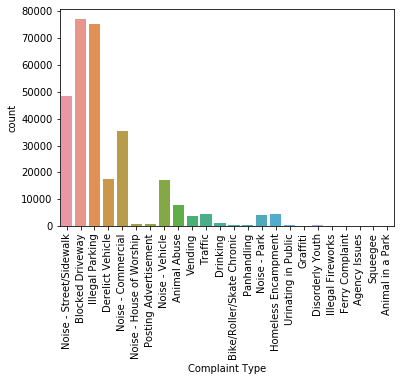

In [25]:
# Using Seaborn
plot = sns.countplot(df_311NYC['Complaint Type'])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

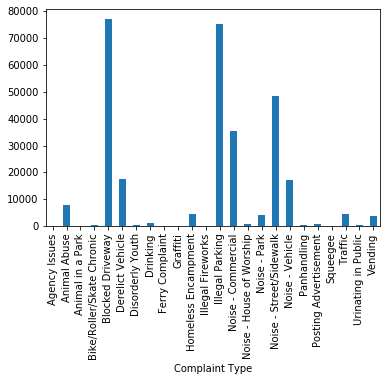

In [26]:
# Using Matplotlib
df_311NYC.groupby(['Complaint Type']).size().plot(kind='bar')
plt.show()

In [27]:
df_311NYC['Descriptor'].value_counts()

Loud Music/Party                  61430
No Access                         56976
Posted Parking Sign Violation     22440
Loud Talking                      21584
Partial Access                    20068
With License Plate                17718
Blocked Hydrant                   16081
Commercial Overnight Parking      12189
Car/Truck Music                   11273
Blocked Sidewalk                  11121
Double Parked Blocking Traffic     5731
Double Parked Blocking Vehicle     4211
Engine Idling                      4189
Banging/Pounding                   4165
Neglected                          3787
Car/Truck Horn                     3511
Congestion/Gridlock                2761
In Prohibited Area                 2025
Other (complaint details)          1969
Unlicensed                         1777
Overnight Commercial Storage       1757
Unauthorized Bus Layover           1367
Truck Route Violation              1014
In Public                           932
Tortured                            854


In [28]:
df_311NYC['Descriptor'].isna().sum()

5914

[Text(0, 0, 'Loud Music/Party'),
 Text(0, 0, 'No Access'),
 Text(0, 0, 'Commercial Overnight Parking'),
 Text(0, 0, 'Blocked Sidewalk'),
 Text(0, 0, 'Posted Parking Sign Violation'),
 Text(0, 0, 'Blocked Hydrant'),
 Text(0, 0, 'With License Plate'),
 Text(0, 0, 'Partial Access'),
 Text(0, 0, 'Unauthorized Bus Layover'),
 Text(0, 0, 'Double Parked Blocking Vehicle'),
 Text(0, 0, 'Double Parked Blocking Traffic'),
 Text(0, 0, 'Vehicle'),
 Text(0, 0, 'Loud Talking'),
 Text(0, 0, 'Banging/Pounding'),
 Text(0, 0, 'Car/Truck Music'),
 Text(0, 0, 'Tortured'),
 Text(0, 0, 'In Prohibited Area'),
 Text(0, 0, 'Congestion/Gridlock'),
 Text(0, 0, 'Neglected'),
 Text(0, 0, 'Car/Truck Horn'),
 Text(0, 0, 'In Public'),
 Text(0, 0, 'Other (complaint details)'),
 Text(0, 0, 'No Shelter'),
 Text(0, 0, 'Truck Route Violation'),
 Text(0, 0, 'Unlicensed'),
 Text(0, 0, 'Overnight Commercial Storage'),
 Text(0, 0, 'Engine Idling'),
 Text(0, 0, 'After Hours - Licensed Est'),
 Text(0, 0, 'Detached Trailer'),
 T

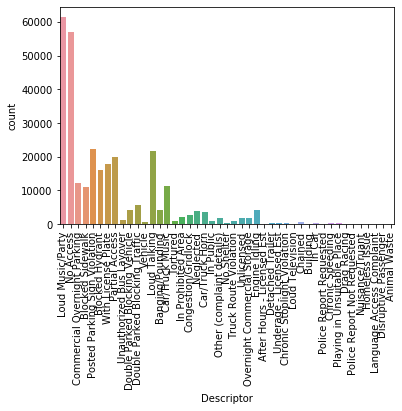

In [29]:
# Using seaborn
plot = sns.countplot(df_311NYC['Descriptor'])
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)

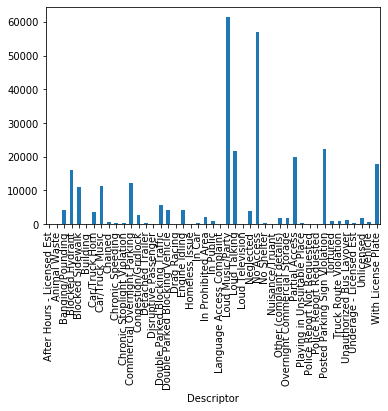

In [30]:
# Using matplotlib
df_311NYC.groupby(['Descriptor']).size().plot(kind = 'bar')
plt.show()

In [31]:
# Location Type
df_311NYC['Location Type'].isna().sum()

131

In [32]:
df_311NYC['Location Type'].value_counts()

Street/Sidewalk               249299
Store/Commercial               20381
Club/Bar/Restaurant            17360
Residential Building/House      6960
Park/Playground                 4773
House of Worship                 929
Residential Building             227
Highway                          215
Parking Lot                      117
House and Store                   93
Vacant Lot                        77
Commercial                        62
Roadway Tunnel                    35
Subway Station                    34
Bridge                             2
Ferry                              1
Park                               1
Terminal                           1
Name: Location Type, dtype: int64

In [33]:
df_311NYC['Location Type'].fillna(value='Street/SideWalk', inplace=True)

[Text(0, 0, 'Street/Sidewalk'),
 Text(0, 0, 'Club/Bar/Restaurant'),
 Text(0, 0, 'Store/Commercial'),
 Text(0, 0, 'House of Worship'),
 Text(0, 0, 'Residential Building/House'),
 Text(0, 0, 'Residential Building'),
 Text(0, 0, 'Park/Playground'),
 Text(0, 0, 'Vacant Lot'),
 Text(0, 0, 'House and Store'),
 Text(0, 0, 'Highway'),
 Text(0, 0, 'Commercial'),
 Text(0, 0, 'Roadway Tunnel'),
 Text(0, 0, 'Subway Station'),
 Text(0, 0, 'Parking Lot'),
 Text(0, 0, 'Bridge'),
 Text(0, 0, 'Terminal'),
 Text(0, 0, 'Street/SideWalk'),
 Text(0, 0, 'Ferry'),
 Text(0, 0, 'Park')]

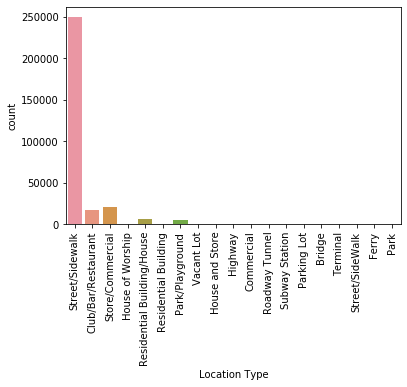

In [34]:
# Plot using seaborn
plot = sns.countplot(df_311NYC['Location Type'])
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)

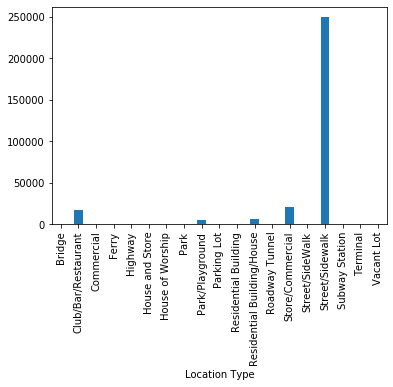

In [35]:
# using Matplotlib
df_311NYC.groupby(['Location Type']).size().plot(kind='bar')
plt.show()

In [36]:
# Incident zip
df_311NYC['Incident Zip'].value_counts()

11385.0    5167
11368.0    4298
11211.0    4225
11234.0    4150
11206.0    3781
           ... 
10111.0       1
11241.0       1
11242.0       1
11371.0       1
11451.0       1
Name: Incident Zip, Length: 201, dtype: int64

In [37]:
df_311NYC['Incident Zip'].isna().sum()

2615

In [38]:
df_311NYC['Incident Zip'].fillna(value=11385, inplace=True)

[Text(0, 0, '83.0'),
 Text(0, 0, '10000.0'),
 Text(0, 0, '10001.0'),
 Text(0, 0, '10002.0'),
 Text(0, 0, '10003.0'),
 Text(0, 0, '10004.0'),
 Text(0, 0, '10005.0'),
 Text(0, 0, '10006.0'),
 Text(0, 0, '10007.0'),
 Text(0, 0, '10009.0'),
 Text(0, 0, '10010.0'),
 Text(0, 0, '10011.0'),
 Text(0, 0, '10012.0'),
 Text(0, 0, '10013.0'),
 Text(0, 0, '10014.0'),
 Text(0, 0, '10016.0'),
 Text(0, 0, '10017.0'),
 Text(0, 0, '10018.0'),
 Text(0, 0, '10019.0'),
 Text(0, 0, '10020.0'),
 Text(0, 0, '10021.0'),
 Text(0, 0, '10022.0'),
 Text(0, 0, '10023.0'),
 Text(0, 0, '10024.0'),
 Text(0, 0, '10025.0'),
 Text(0, 0, '10026.0'),
 Text(0, 0, '10027.0'),
 Text(0, 0, '10028.0'),
 Text(0, 0, '10029.0'),
 Text(0, 0, '10030.0'),
 Text(0, 0, '10031.0'),
 Text(0, 0, '10032.0'),
 Text(0, 0, '10033.0'),
 Text(0, 0, '10034.0'),
 Text(0, 0, '10035.0'),
 Text(0, 0, '10036.0'),
 Text(0, 0, '10037.0'),
 Text(0, 0, '10038.0'),
 Text(0, 0, '10039.0'),
 Text(0, 0, '10040.0'),
 Text(0, 0, '10041.0'),
 Text(0, 0, '10044.

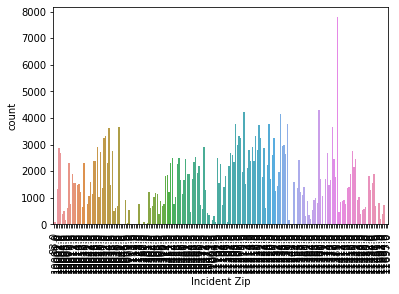

In [39]:
#Plot using seaborn
plot = sns.countplot(df_311NYC['Incident Zip'])
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)

In [40]:
df_311NYC['Address Type'].value_counts()

ADDRESS         238644
INTERSECTION     43366
BLOCKFACE        12014
LATLONG           3509
PLACENAME          350
Name: Address Type, dtype: int64

In [41]:
df_311NYC['Address Type'].isna().sum()

2815

In [42]:
df_311NYC['Address Type'].fillna(value='ADDRESS', inplace=True)

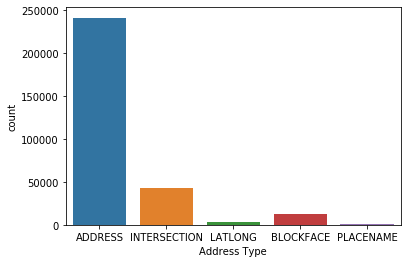

In [43]:
# Plot using seaborn
sns.countplot(df_311NYC['Address Type'])

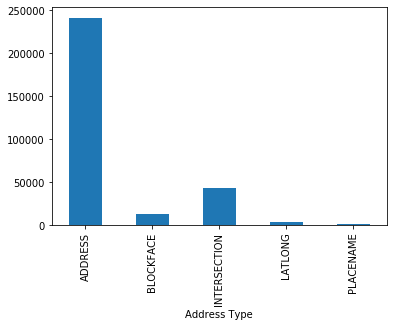

In [44]:
df_311NYC.groupby(['Address Type']).size().plot(kind='bar')
plt.show()

In [45]:
df_311NYC['City'].value_counts()

BROOKLYN               98307
NEW YORK               65994
BRONX                  40702
STATEN ISLAND          12343
JAMAICA                 7296
ASTORIA                 6330
FLUSHING                5971
RIDGEWOOD               5163
CORONA                  4295
WOODSIDE                3544
SOUTH RICHMOND HILL     2774
OZONE PARK              2755
EAST ELMHURST           2734
ELMHURST                2673
WOODHAVEN               2464
MASPETH                 2462
LONG ISLAND CITY        2437
SOUTH OZONE PARK        2173
RICHMOND HILL           1904
FRESH MEADOWS           1899
QUEENS VILLAGE          1814
MIDDLE VILLAGE          1765
JACKSON HEIGHTS         1689
FOREST HILLS            1688
REGO PARK               1486
BAYSIDE                 1221
COLLEGE POINT           1220
FAR ROCKAWAY            1179
WHITESTONE              1098
HOLLIS                  1012
HOWARD BEACH             931
ROSEDALE                 922
SPRINGFIELD GARDENS      883
SAINT ALBANS             834
KEW GARDENS   

In [46]:
df_311NYC['City'].isna().sum()

2614

In [47]:
df_311NYC['City'].fillna(value='BROOKLYN', inplace=True)

[Text(0, 0, 'NEW YORK'),
 Text(0, 0, 'ASTORIA'),
 Text(0, 0, 'BRONX'),
 Text(0, 0, 'ELMHURST'),
 Text(0, 0, 'BROOKLYN'),
 Text(0, 0, 'KEW GARDENS'),
 Text(0, 0, 'JACKSON HEIGHTS'),
 Text(0, 0, 'MIDDLE VILLAGE'),
 Text(0, 0, 'REGO PARK'),
 Text(0, 0, 'SAINT ALBANS'),
 Text(0, 0, 'JAMAICA'),
 Text(0, 0, 'SOUTH RICHMOND HILL'),
 Text(0, 0, 'RIDGEWOOD'),
 Text(0, 0, 'HOWARD BEACH'),
 Text(0, 0, 'FOREST HILLS'),
 Text(0, 0, 'STATEN ISLAND'),
 Text(0, 0, 'OZONE PARK'),
 Text(0, 0, 'RICHMOND HILL'),
 Text(0, 0, 'WOODHAVEN'),
 Text(0, 0, 'FLUSHING'),
 Text(0, 0, 'CORONA'),
 Text(0, 0, 'QUEENS VILLAGE'),
 Text(0, 0, 'OAKLAND GARDENS'),
 Text(0, 0, 'HOLLIS'),
 Text(0, 0, 'MASPETH'),
 Text(0, 0, 'EAST ELMHURST'),
 Text(0, 0, 'SOUTH OZONE PARK'),
 Text(0, 0, 'WOODSIDE'),
 Text(0, 0, 'FRESH MEADOWS'),
 Text(0, 0, 'LONG ISLAND CITY'),
 Text(0, 0, 'ROCKAWAY PARK'),
 Text(0, 0, 'SPRINGFIELD GARDENS'),
 Text(0, 0, 'COLLEGE POINT'),
 Text(0, 0, 'BAYSIDE'),
 Text(0, 0, 'GLEN OAKS'),
 Text(0, 0, 'FAR ROCK

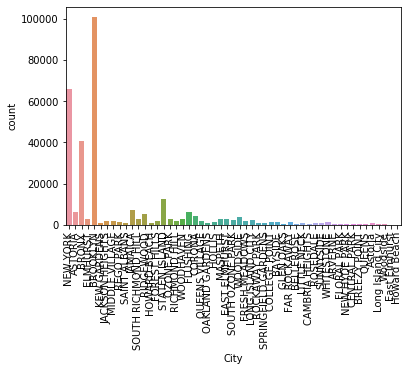

In [48]:
# Plot using seaborn
plot = sns.countplot(df_311NYC['City'])
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)

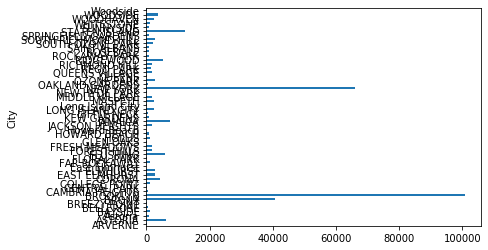

In [49]:
# Plot using matplotlib
df_311NYC.groupby(['City']).size().plot(kind= 'barh')
plt.show()

In [50]:
df_311NYC['Facility Type'].value_counts()

Precinct    298527
Name: Facility Type, dtype: int64

In [51]:
df_311NYC['Facility Type'].isna().sum()

2171

In [52]:
df_311NYC['Status'].value_counts()

Closed      298471
Open          1439
Assigned       786
Draft            2
Name: Status, dtype: int64

In [53]:
df_311NYC['Status'].isna().sum()

0

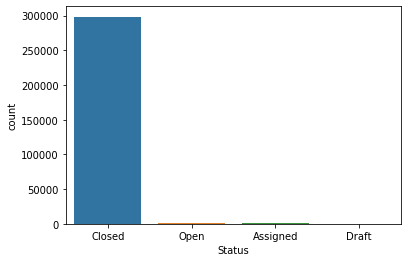

In [54]:
# Plot using seaborn
sns.countplot(df_311NYC['Status'])

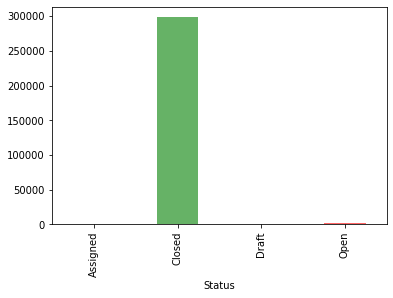

In [55]:
# plot using matplotlib
df_311NYC.groupby(['Status']).size().plot(kind='bar', color=['r', 'g', 'r', 'r'], alpha=0.6)
plt.show()

In [56]:
df_311NYC['Request_Closing_Time'].value_counts()

0 days 00:36:00    492
0 days 00:44:00    473
0 days 00:51:00    472
0 days 00:53:00    468
0 days 01:10:00    467
                  ... 
0 days 07:22:16      1
0 days 11:02:19      1
1 days 08:43:28      1
0 days 11:51:03      1
0 days 12:12:46      1
Name: Request_Closing_Time, Length: 47608, dtype: int64

In [57]:
df_311NYC['Request_Closing_Time'].isna().sum()

2164

In [58]:
df_311NYC['Request_Closing_Time'].fillna(value=df_311NYC['Request_Closing_Time'].mean(), inplace=True)

In [59]:
df_311NYC.head(10)

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,City,Facility Type,Status,Due Date,Borough,Park Facility Name,Park Borough,Request_Closing_Time
0,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,ADDRESS,NEW YORK,Precinct,Closed,01-01-16 7:59,MANHATTAN,Unspecified,MANHATTAN,00:55:15
1,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ADDRESS,ASTORIA,Precinct,Closed,01-01-16 7:59,QUEENS,Unspecified,QUEENS,01:26:16
2,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,ADDRESS,BRONX,Precinct,Closed,01-01-16 7:59,BRONX,Unspecified,BRONX,04:51:31
3,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,ADDRESS,BRONX,Precinct,Closed,01-01-16 7:57,BRONX,Unspecified,BRONX,07:45:14
4,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ADDRESS,ELMHURST,Precinct,Closed,01-01-16 7:56,QUEENS,Unspecified,QUEENS,03:27:02
5,2015-12-31 23:56:30,2016-01-01 01:50:00,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,ADDRESS,BROOKLYN,Precinct,Closed,01-01-16 7:56,BROOKLYN,Unspecified,BROOKLYN,01:53:30
6,2015-12-31 23:55:32,2016-01-01 01:53:00,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10032.0,ADDRESS,NEW YORK,Precinct,Closed,01-01-16 7:55,MANHATTAN,Unspecified,MANHATTAN,01:57:28
7,2015-12-31 23:54:05,2016-01-01 01:42:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10457.0,ADDRESS,BRONX,Precinct,Closed,01-01-16 7:54,BRONX,Unspecified,BRONX,01:47:55
8,2015-12-31 23:53:58,2016-01-01 08:27:00,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11415.0,ADDRESS,KEW GARDENS,Precinct,Closed,01-01-16 7:53,QUEENS,Unspecified,QUEENS,08:33:02
9,2015-12-31 23:53:58,2016-01-01 01:17:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,ADDRESS,BROOKLYN,Precinct,Closed,01-01-16 7:53,BROOKLYN,Unspecified,BROOKLYN,01:23:02


In [60]:
df_311NYC['Request_Closing_Time'].isna().sum()

0

In [61]:
# Create a function to convert Request Closing Time into hours
def convert_To_hours(timeDelta):
    days = timeDelta.days
    hours = round(timeDelta.seconds/3600, 2)
    result = (days * 24) + hours
    return result

In [62]:
# Create one more column 'Request_Closing_Time_In_Hours'
df_311NYC['Request_Closing_Time_In_Hours'] = df_311NYC['Request_Closing_Time'].apply(convert_To_hours)

In [63]:
df_311NYC['Request_Closing_Time_In_Hours'].head()

0    0.92
1    1.44
2    4.86
3    7.75
4    3.45
Name: Request_Closing_Time_In_Hours, dtype: float64

In [64]:
df_311NYC['Request_Closing_Time_In_Hours'].value_counts()

4.31     2319
0.88      919
0.60      905
0.85      870
0.93      869
         ... 
73.13       1
31.66       1
37.48       1
33.13       1
31.60       1
Name: Request_Closing_Time_In_Hours, Length: 4499, dtype: int64

In [65]:
df_311NYC['Request_Closing_Time_In_Hours'].isna().sum()

0

In [66]:
# Convert hours into category
df_311NYC['Request_Closing_Time_Category'] = df_311NYC['Request_Closing_Time_In_Hours'].apply(lambda x : 'Fast' if x < 2.0 else ('Acceptable' if 4.0 > x >= 2.0 else ('Slow' if 6.0 > x >= 4.0 else 'Very Slow')))

In [67]:
df_311NYC['Request_Closing_Time_Category'].head()

0          Fast
1          Fast
2          Slow
3     Very Slow
4    Acceptable
Name: Request_Closing_Time_Category, dtype: object

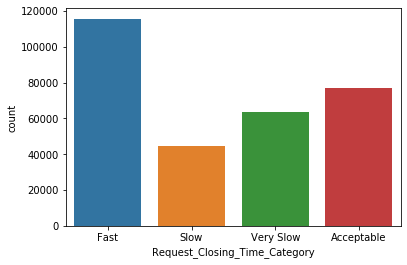

In [68]:
# Plot the graph
sns.countplot(df_311NYC['Request_Closing_Time_Category'])

In [71]:
# Let's look at the ticket created each month irrespective of Month
df_311NYC['Created_Month'] = df_311NYC['Created Date'].dt.month

In [72]:
df_311NYC['Created_Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Created_Month, dtype: int64

In [73]:
df_311NYC['Created_Month'].value_counts()

5     36437
9     35427
6     35315
8     34956
7     34888
10    32605
11    30773
12    30521
4     27305
3      2471
Name: Created_Month, dtype: int64

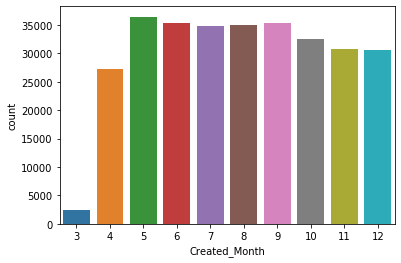

In [74]:
# Plot the graph
sns.countplot(df_311NYC['Created_Month'])

# Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [75]:
df_311NYC['City'].head()

0    NEW YORK
1     ASTORIA
2       BRONX
3       BRONX
4    ELMHURST
Name: City, dtype: object

In [76]:
# Group them for City (location) first and Complain Type in that
df_grouped = df_311NYC.groupby(['City', 'Complaint Type']).agg({'Request_Closing_Time_In_Hours':'mean'})

In [77]:
df_grouped

Request_Closing_Time_In_Hours
City     Complaint Type                                        
ARVERNE  Animal Abuse                                  2.153158
         Blocked Driveway                              2.526000
         Derelict Vehicle                              2.968889
         Disorderly Youth                              3.595000
         Drinking                                      0.240000
...                                                         ...
Woodside Blocked Driveway                              6.405455
         Derelict Vehicle                              4.965000
         Illegal Parking                               5.219500
         Noise - Commercial                            2.390000
         Noise - Street/Sidewalk                       3.410000

[766 rows x 1 columns]

In [78]:
# Get the average of this grouped dataframe and get 

In [79]:
desc = df_311NYC.groupby(by='Complaint Type')['Descriptor'].agg('count')
desc

Complaint Type
Agency Issues                    6
Animal Abuse                  7778
Animal in a Park                 1
Bike/Roller/Skate Chronic        0
Blocked Driveway             77044
Derelict Vehicle             17718
Disorderly Youth               286
Drinking                      1280
Ferry Complaint                  2
Graffiti                       113
Homeless Encampment              0
Illegal Fireworks                0
Illegal Parking              75361
Noise - Commercial           35577
Noise - House of Worship       931
Noise - Park                  4042
Noise - Street/Sidewalk      48612
Noise - Vehicle              17083
Panhandling                      0
Posting Advertisement          650
Squeegee                         0
Traffic                       4498
Urinating in Public              0
Vending                       3802
Name: Descriptor, dtype: int64

In [80]:
#New York city with their status
df_311NYC.loc[df_311NYC['City']=='NEW YORK', ]['Borough'].value_counts()

MANHATTAN    65992
QUEENS           2
Name: Borough, dtype: int64

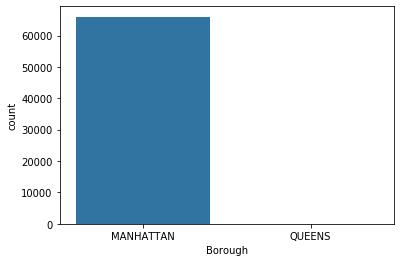

In [81]:
# plot using seaborn
sns.countplot(x=df_311NYC.loc[df_311NYC['City']=='NEW YORK', ]['Borough'], data=df_311NYC)

In [82]:
# Complain Type of NewYork City
df_311NYC.loc[df_311NYC['City']=='NEW YORK', :]['Complaint Type'].value_counts()

Noise - Street/Sidewalk      20433
Noise - Commercial           14550
Illegal Parking              12128
Noise - Vehicle               5485
Homeless Encampment           2775
Vending                       2399
Blocked Driveway              2072
Traffic                       1549
Animal Abuse                  1525
Noise - Park                  1211
Derelict Vehicle               537
Drinking                       295
Urinating in Public            251
Bike/Roller/Skate Chronic      225
Noise - House of Worship       194
Panhandling                    193
Disorderly Youth                69
Posting Advertisement           41
Illegal Fireworks               36
Graffiti                        22
Squeegee                         4
Name: Complaint Type, dtype: int64

[Text(0, 0, 'Noise - Street/Sidewalk'),
 Text(0, 0, 'Illegal Parking'),
 Text(0, 0, 'Noise - House of Worship'),
 Text(0, 0, 'Noise - Commercial'),
 Text(0, 0, 'Blocked Driveway'),
 Text(0, 0, 'Vending'),
 Text(0, 0, 'Noise - Vehicle'),
 Text(0, 0, 'Panhandling'),
 Text(0, 0, 'Animal Abuse'),
 Text(0, 0, 'Noise - Park'),
 Text(0, 0, 'Homeless Encampment'),
 Text(0, 0, 'Traffic'),
 Text(0, 0, 'Derelict Vehicle'),
 Text(0, 0, 'Drinking'),
 Text(0, 0, 'Urinating in Public'),
 Text(0, 0, 'Bike/Roller/Skate Chronic'),
 Text(0, 0, 'Graffiti'),
 Text(0, 0, 'Posting Advertisement'),
 Text(0, 0, 'Disorderly Youth'),
 Text(0, 0, 'Illegal Fireworks'),
 Text(0, 0, 'Squeegee')]

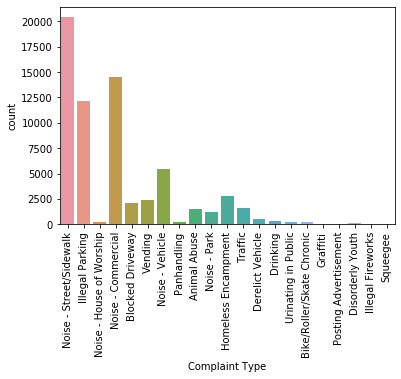

In [83]:
plot = sns.countplot(df_311NYC.loc[df_311NYC['City']=='NEW YORK', :]['Complaint Type'])
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)

In [84]:
# Ave time taken to a case in new york city
df_311NYC.loc[(df_311NYC['City']=='NEW YORK')&(df_311NYC['Status']=='Closed'),:]['Request_Closing_Time'].mean()

Timedelta('0 days 02:58:17.716514')

In [85]:
df_311NYC.loc[(df_311NYC['City']=='NEW YORK')&(df_311NYC['Status']=='Closed'),:]['Request_Closing_Time'].std()

Timedelta('0 days 04:11:13.587563')

In [86]:
df_311NYC.loc[(df_311NYC['Status']=='Closed'),:]['Request_Closing_Time'].mean()

Timedelta('0 days 04:18:50.538940')

In [87]:
df_311NYC['Borough'].value_counts()

BROOKLYN         98307
QUEENS           80641
MANHATTAN        66131
BRONX            40702
STATEN ISLAND    12343
Unspecified       2574
Name: Borough, dtype: int64

In [88]:
df_311NYC['Location Type'].value_counts()

Street/Sidewalk               249299
Store/Commercial               20381
Club/Bar/Restaurant            17360
Residential Building/House      6960
Park/Playground                 4773
House of Worship                 929
Residential Building             227
Highway                          215
Street/SideWalk                  131
Parking Lot                      117
House and Store                   93
Vacant Lot                        77
Commercial                        62
Roadway Tunnel                    35
Subway Station                    34
Bridge                             2
Ferry                              1
Park                               1
Terminal                           1
Name: Location Type, dtype: int64

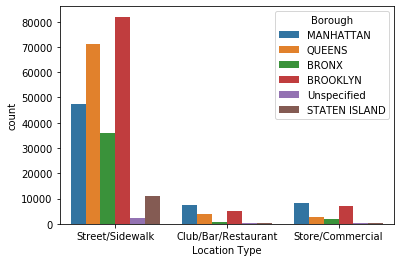

In [89]:
#Top Location type and their countplot with hues='Borough'
sns.countplot(df_311NYC.loc[df_311NYC['Location Type'].isin(['Street/Sidewalk','Store/Commercial','Club/Bar/Restaurant'])]
              ['Location Type'],data=df_311NYC,hue='Borough')


# Perform a statistical test for the following:

Whether the average response time across complaint types is similar or not (overall)

Are the type of complaint or service requested and location related?

In [90]:
# Import required libraries
import scipy.stats as stats
from math import sqrt

In [91]:
# Let's Try ANOVA for first one

# Null Hypothesis      H0 : All Complain Types average response time mean is similar
# Alternate Hypothesis H1 : Not similar

In [92]:
# Display the complaint type and city together
df_311NYC[['Complaint Type','City']].head()

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
1,Blocked Driveway,ASTORIA
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
4,Illegal Parking,ELMHURST


In [93]:
# Find Top 10 complaint Types
df_311NYC['Complaint Type'].value_counts()[0:10, ]

Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Noise - Vehicle            17083
Animal Abuse                7778
Traffic                     4498
Homeless Encampment         4416
Noise - Park                4042
Name: Complaint Type, dtype: int64

In [94]:
#plot the major complaint types and their count
ser = df_311NYC['Complaint Type'].value_counts()[0:5,]
ser

Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Name: Complaint Type, dtype: int64

In [95]:
top5_complaints_type_names = ser.nlargest().index
top5_complaints_type_names

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle'],
      dtype='object')

[Text(0, 0, 'Blocked Driveway'),
 Text(0, 0, 'Illegal Parking'),
 Text(0, 0, 'Noise - Street/Sidewalk'),
 Text(0, 0, 'Noise - Commercial'),
 Text(0, 0, 'Derelict Vehicle')]

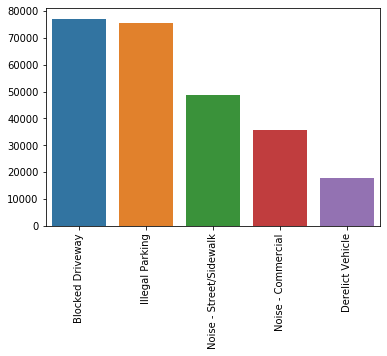

In [96]:
plot = sns.barplot(x=ser.nlargest().index, y= ser.nlargest().values)

plot.set_xticklabels(plot.get_xticklabels(),rotation =90)

In [97]:
df_311NYC.head()

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,City,Facility Type,Status,Due Date,Borough,Park Facility Name,Park Borough,Request_Closing_Time,Request_Closing_Time_In_Hours,Request_Closing_Time_Category,Created_Month
0,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,ADDRESS,NEW YORK,Precinct,Closed,01-01-16 7:59,MANHATTAN,Unspecified,MANHATTAN,00:55:15,0.92,Fast,12
1,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ADDRESS,ASTORIA,Precinct,Closed,01-01-16 7:59,QUEENS,Unspecified,QUEENS,01:26:16,1.44,Fast,12
2,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,ADDRESS,BRONX,Precinct,Closed,01-01-16 7:59,BRONX,Unspecified,BRONX,04:51:31,4.86,Slow,12
3,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,ADDRESS,BRONX,Precinct,Closed,01-01-16 7:57,BRONX,Unspecified,BRONX,07:45:14,7.75,Very Slow,12
4,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ADDRESS,ELMHURST,Precinct,Closed,01-01-16 7:56,QUEENS,Unspecified,QUEENS,03:27:02,3.45,Acceptable,12


In [98]:
sample_data = df_311NYC.loc[df_311NYC['Complaint Type'].isin(top5_complaints_type_names), ['Complaint Type', 'Request_Closing_Time_In_Hours']]
sample_data.head()

,Complaint Type,Request_Closing_Time_In_Hours
0,Noise - Street/Sidewalk,0.92
1,Blocked Driveway,1.44
2,Blocked Driveway,4.86
3,Illegal Parking,7.75
4,Illegal Parking,3.45


In [99]:
sample_data.shape

(254312, 2)

In [100]:
sample_data.isna().sum()

Complaint Type                   0
Request_Closing_Time_In_Hours    0
dtype: int64

In [101]:
sample_data.dropna(how='any')

,Complaint Type,Request_Closing_Time_In_Hours
0,Noise - Street/Sidewalk,0.92
1,Blocked Driveway,1.44
2,Blocked Driveway,4.86
3,Illegal Parking,7.75
4,Illegal Parking,3.45
...,...,...
300693,Noise - Commercial,4.31
300694,Blocked Driveway,2.01
300695,Noise - Commercial,3.12
300696,Noise - Commercial,4.09


In [102]:
s1 = sample_data[sample_data['Complaint Type'] == top5_complaints_type_names[0]].Request_Closing_Time_In_Hours

In [103]:
s1

1          1.44
2          4.86
7          1.80
9          1.38
10         7.80
          ...  
300665     1.21
300672    15.71
300679     1.21
300687     2.25
300694     2.01
Name: Request_Closing_Time_In_Hours, Length: 77044, dtype: float64

In [104]:
s2 = sample_data[sample_data['Complaint Type'] == top5_complaints_type_names[1]].Request_Closing_Time_In_Hours

In [105]:
s2

3         7.75
4         3.45
5         1.89
6         1.96
8         8.55
          ... 
300643    2.94
300658    1.38
300670    8.42
300671    3.77
300690    8.10
Name: Request_Closing_Time_In_Hours, Length: 75361, dtype: float64

In [106]:
s3 = sample_data[sample_data['Complaint Type'] == top5_complaints_type_names[2]].Request_Closing_Time_In_Hours
s3

0         0.92
12        2.48
19        0.78
38        0.49
54        1.50
          ... 
300674    2.34
300675    1.02
300681    2.90
300683    2.93
300689    3.65
Name: Request_Closing_Time_In_Hours, Length: 48612, dtype: float64

In [107]:
s4 = sample_data[sample_data['Complaint Type'] == top5_complaints_type_names[3]].Request_Closing_Time_In_Hours
s4

17        0.85
18        2.93
22        1.26
29        2.50
30        1.99
          ... 
300692    0.64
300693    4.31
300695    3.12
300696    4.09
300697    4.15
Name: Request_Closing_Time_In_Hours, Length: 35577, dtype: float64

In [108]:
s5 = sample_data[sample_data['Complaint Type'] == top5_complaints_type_names[4]].Request_Closing_Time_In_Hours
s5

14        10.49
151        3.95
255        1.36
256        4.13
295        0.75
          ...  
300476    10.08
300488     3.82
300500     2.75
300523     1.83
300593     4.76
Name: Request_Closing_Time_In_Hours, Length: 17718, dtype: float64

In [109]:
s1.isna().sum()

0

In [110]:
s2.isna().sum()

0

In [111]:
s3.isna().sum()

0

In [112]:
s4.isna().sum()

0

In [113]:
s5.isna().sum()

0

In [114]:
#
stats.f_oneway(s1, s2, s3, s4, s5)

F_onewayResult(statistic=1799.3742132865893, pvalue=0.0)

# As seen in the above results, pvalue is less than 0.05 so we reject null hypothesis and average response time is not same.


In [115]:
# Let's Try ChiSquare Test for second one - # Are the type of complaint or service requested and location related?

# Null hypothesis H0        : 2 categories - Complain Type and Location is independent means not related
# Alternative hypothesis H1 : 2 categories - Complain Type and Location is dependent means related


In [116]:
top5Locations = df_311NYC['City'].value_counts()[:5]
top5Locations

BROOKLYN         100921
NEW YORK          65994
BRONX             40702
STATEN ISLAND     12343
JAMAICA            7296
Name: City, dtype: int64

In [117]:
top5LocationsName = top5Locations.index
top5LocationsName

Index(['BROOKLYN', 'NEW YORK', 'BRONX', 'STATEN ISLAND', 'JAMAICA'], dtype='object')

In [118]:
sample_data = df_311NYC.loc[(df_311NYC['Complaint Type'].isin(top5_complaints_type_names)) & (df_311NYC['City'].isin(top5LocationsName)), ['Complaint Type', 'City']]
sample_data.head()

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
5,Illegal Parking,BROOKLYN
6,Illegal Parking,NEW YORK


In [119]:
ch2, p_value, df, exp_frq = stats.chi2_contingency(pd.crosstab(sample_data['Complaint Type'], sample_data['City']))

In [120]:
#Let's check p_value
p_value

0.0

# It is seen that pvalue is less than 0.05 so we reject null hypothesis means complain type and location is not independent.
